In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [ ]:
data = pd.read_csv('../data/final_data.csv', header = 0)

In [ ]:
data.head()

,TARGET,X1_1,X1_2,X1_3,X2_1,X2_2,X2_3,X2_4,X2_5,X3_1,...,X3993,X3994,X3995,X3996,X3997,X3998,X3999,X4000,X4001,X4002
0,0,0,0,0,0,0,0,0,0,1,...,0,0.3,0.8,0.9,0.0,0.3,0.0,0.1,0.3,67.493827
1,0,1,0,0,0,0,0,1,0,0,...,0,0.2,0.6,0.6,0.2,0.7,0.2,0.1,0.6,66.843621
2,0,1,0,0,0,0,0,1,0,0,...,0,0.1,0.1,0.3,0.3,0.6,0.1,0.5,0.4,67.061486
3,0,0,0,0,0,1,0,0,0,0,...,0,0.2,0.6,0.4,0.8,0.5,0.7,0.2,0.7,71.020576
4,0,1,0,0,0,0,0,1,0,0,...,0,0.4,0.9,0.6,0.4,0.5,0.2,0.1,0.7,67.064391


In [ ]:
# 단일 값으로 구성된 칼럼 확인 및 제거
single_value_columns = []

for column in data.columns:
    if data[column].nunique() == 1:
        single_value_columns.append(column)

if single_value_columns:
    print("Single value columns:", single_value_columns)
    new_data = data.drop(columns=single_value_columns)
else:
    print("No single value columns found.")
    new_data = data.copy()

print("Original DataFrame:")
data.head()

print("\nNew DataFrame (after removing single value columns):")
new_data.head()

Single value columns: ['X1651', 'X1670', 'X1672', 'X1690', 'X1805', 'X1812', 'X1859', 'X1863', 'X1910', 'X1935', 'X1941', 'X1950', 'X2003', 'X2026', 'X2131', 'X2149', 'X2172', 'X2188', 'X2191', 'X2230', 'X2231', 'X2309', 'X2323', 'X2339', 'X2393', 'X2481', 'X2483', 'X2517', 'X2532', 'X2539', 'X2541', 'X2552', 'X2573', 'X2624', 'X2631', 'X2702', 'X2728', 'X2741', 'X2788', 'X2834', 'X2844', 'X2847', 'X2926', 'X2969', 'X2999', 'X3010', 'X3029', 'X3064', 'X3077', 'X3094', 'X3122', 'X3152', 'X3154', 'X3222', 'X3224', 'X3253', 'X3315', 'X3366', 'X3371', 'X3405', 'X3426', 'X3475', 'X3513', 'X3525', 'X3548', 'X3554', 'X3573', 'X3653', 'X3677', 'X3712', 'X3740', 'X3771', 'X3795', 'X3813', 'X3832', 'X3848', 'X3874', 'X3885', 'X3903', 'X3922', 'X3939', 'X3957', 'X3975', 'X3993']
Original DataFrame:

New DataFrame (after removing single value columns):


,TARGET,X1_1,X1_2,X1_3,X2_1,X2_2,X2_3,X2_4,X2_5,X3_1,...,X3992,X3994,X3995,X3996,X3997,X3998,X3999,X4000,X4001,X4002
0,0,0,0,0,0,0,0,0,0,1,...,-28.1,0.3,0.8,0.9,0.0,0.3,0.0,0.1,0.3,67.493827
1,0,1,0,0,0,0,0,1,0,0,...,-29.6,0.2,0.6,0.6,0.2,0.7,0.2,0.1,0.6,66.843621
2,0,1,0,0,0,0,0,1,0,0,...,-28.9,0.1,0.1,0.3,0.3,0.6,0.1,0.5,0.4,67.061486
3,0,0,0,0,0,1,0,0,0,0,...,-28.7,0.2,0.6,0.4,0.8,0.5,0.7,0.2,0.7,71.020576
4,0,1,0,0,0,0,0,1,0,0,...,-27.0,0.4,0.9,0.6,0.4,0.5,0.2,0.1,0.7,67.064391


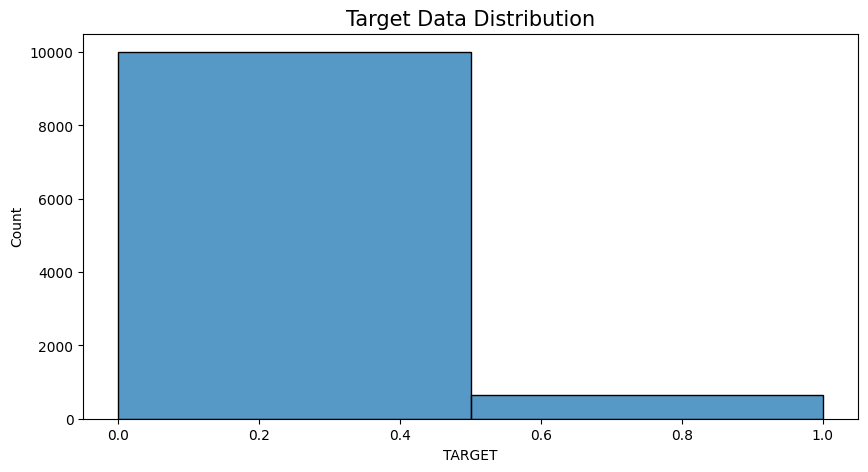

Target Label Counts
Counter({0: 10000, 1: 642})


In [ ]:
# Target Data Check
plt.figure(figsize=(10,5))
sns.histplot(data['TARGET'], bins=2)
plt.title('Target Data Distribution', fontsize=15)
plt.show()

print('Target Label Counts')
print(Counter(data['TARGET']))

#Class Imbalance

In [ ]:
y = new_data['TARGET']
X = new_data.iloc[:, 1:]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.3, stratify = y, random_state = 2023)
cv = StratifiedKFold(n_splits = 3)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV



In [ ]:
param_grid_rf = {
    'n_estimators': [100, 150, 200],
    'max_depth': [2, 5, 7],
    'min_samples_split': [2, 5, 7],
    'min_samples_leaf': [1, 2, 3],
}

grid_search_rf = GridSearchCV(RandomForestClassifier(class_weight='balanced',random_state=2023), param_grid_rf, cv=3, scoring='recall')
grid_search_rf.fit(train_x, train_y)

print("Best Hyperparameters for RandomForest:", grid_search_rf.best_params_)

best_rf_model = grid_search_rf.best_estimator_
best_rf_model.fit(train_x, train_y)


Best Hyperparameters for RandomForest: {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


RandomForestClassifier(class_weight='balanced', max_depth=2, n_estimators=200,
                       random_state=2023)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# 모델 예측
rf_predictions = best_rf_model.predict(test_x)


# 각 모델별 confusion matrix 출력
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# 각 모델별 성능 평가 출력
def evaluate_model(y_true, y_pred, model_name):
    print(f"Performance Metrics for {model_name}:")
    print(classification_report(y_true, y_pred))
    plot_confusion_matrix(y_true, y_pred, f"Confusion Matrix - {model_name}")

# 모델별 성능 평가 및 시각화
evaluate_model(test_y, rf_predictions, "RandomForest")


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
param_dist_rf = {
    'n_estimators': range(50, 328),
    'max_depth': range(1, 8),
    'min_samples_split': range(2, 21),
    'min_samples_leaf': range(1, 11),
}

# RandomizedSearchCV 객체 생성 (class_weight 설정)
random_search_rf = RandomizedSearchCV(
    RandomForestClassifier(class_weight='balanced', random_state=2023),
    param_distributions=param_dist_rf,
    n_iter=15,
    cv=3,
    scoring='recall',
    random_state=2023
)

# RandomizedSearchCV 수행
random_search_rf.fit(train_x, train_y)

# 최적 하이퍼파라미터 출력
print("Best Hyperparameters for RandomForest:", random_search_rf.best_params_)

# 최적 모델로 재학습
best_rf_model2 = random_search_rf.best_estimator_
best_rf_model2.fit(train_x, train_y)


Best Hyperparameters for RandomForest: {'n_estimators': 170, 'min_samples_split': 11, 'min_samples_leaf': 3, 'max_depth': 2}


RandomForestClassifier(class_weight='balanced', max_depth=2, min_samples_leaf=3,
                       min_samples_split=11, n_estimators=170,
                       random_state=2023)

Performance Metrics for RandomForest:
              precision    recall  f1-score   support

           0       0.96      0.74      0.84      3000
           1       0.12      0.56      0.20       193

    accuracy                           0.73      3193
   macro avg       0.54      0.65      0.52      3193
weighted avg       0.91      0.73      0.80      3193



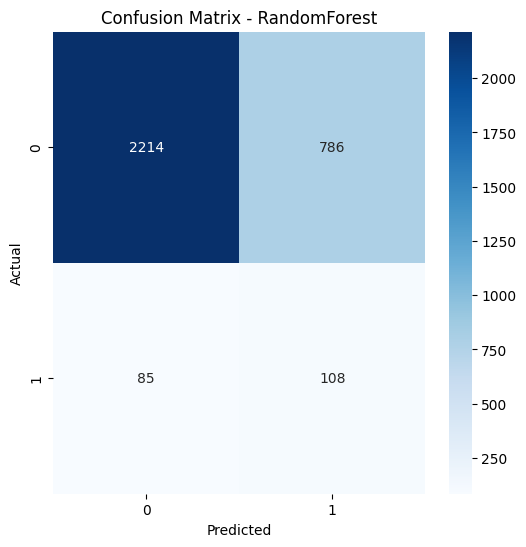

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# RandomForest 모델 예측
rf_predictions2 = best_rf_model2.predict(test_x)


# 각 모델별 confusion matrix 출력
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# 각 모델별 성능 평가 출력
def evaluate_model(y_true, y_pred, model_name):
    print(f"Performance Metrics for {model_name}:")
    print(classification_report(y_true, y_pred))
    plot_confusion_matrix(y_true, y_pred, f"Confusion Matrix - {model_name}")




# RandomForest 모델 성능 평가 및 시각화
evaluate_model(test_y, rf_predictions2, "RandomForest")


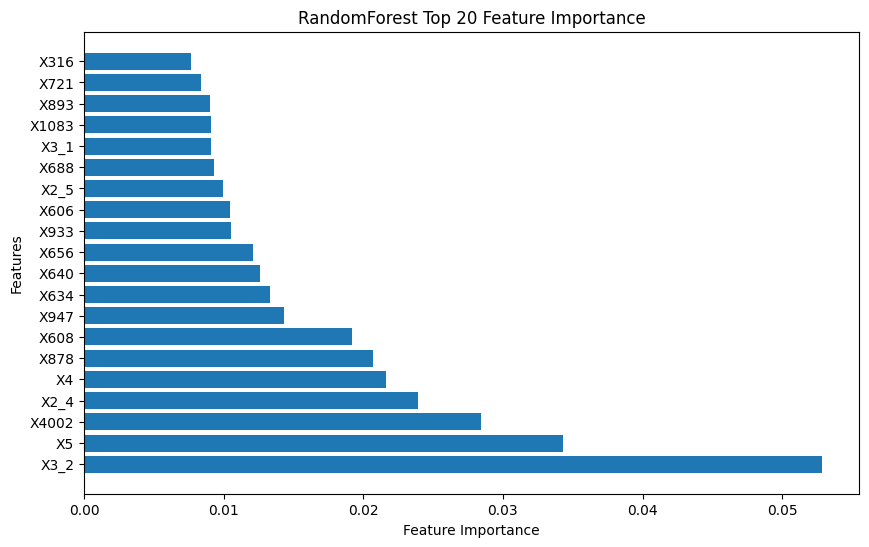

In [ ]:
import matplotlib.pyplot as plt

# RandomForest 모델의 feature importance
feature_importances_rf = best_rf_model2.feature_importances_

# 각 특성의 중요도를 내림차순으로 정렬
sorted_importance_rf = sorted(zip(feature_importances_rf, train_x.columns), reverse=True)

# 상위 20개의 feature importance 및 특성 이름 추출
top_features_rf = [feature for importance, feature in sorted_importance_rf[:20]]
top_importances_rf = [importance for importance, _ in sorted_importance_rf[:20]]

# 시각화
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_features_rf)), top_importances_rf, align='center')
plt.yticks(range(len(top_features_rf)), top_features_rf)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('RandomForest Top 20 Feature Importance')
plt.show()


In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 5.5 MB/s eta 0:00:00


In [ ]:
import shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [ ]:
explainer = shap.TreeExplainer(best_rf_model2)

In [ ]:
true_y = list(test_y)
pred_y = list(rf_predictions2)
TP_index = []
TN_index = []
FN_index = []
FP_index = []

for i ,(true, pred) in enumerate(zip(true_y, pred_y)):
    if (true == 1) and (pred == 1):
        TP_index.append(i)
    elif (true == 1) and (pred == 0):
        FN_index.append(i)
    elif (true == 0) and (pred == 1):
        FP_index.append(i)
    elif (true == 0) and (pred == 0):
        TN_index.append(i)

In [ ]:
print(len(TP_index), len(TN_index), len(FN_index), len(FP_index))

108 2214 85 786


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


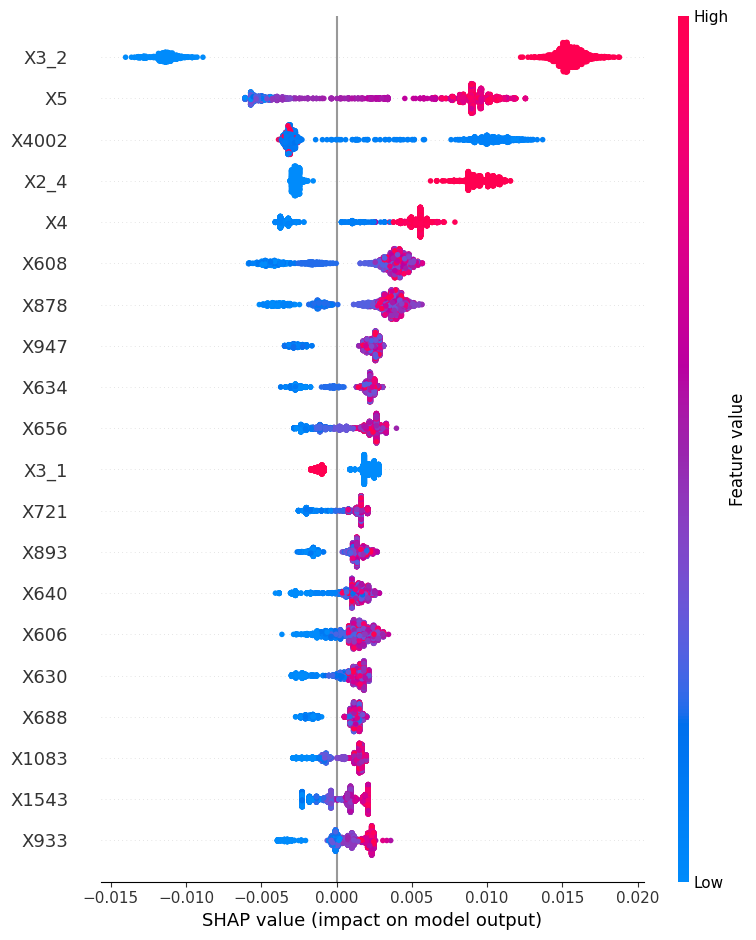

In [ ]:
shap_values_TN = explainer.shap_values(test_x.iloc[TN_index, :])
# Summary plot
plt.figure(figsize=(7,7))
shap.summary_plot(shap_values_TN[0], test_x.iloc[TN_index, :])
plt.show()